In [1]:
# Import the functions and class from your data loader file
from tensorflow.keras.optimizers import Adam
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm



from data_loader import load_data, ImageDataGenerator

import matplotlib.pyplot as plt
import UNet
# importlib.reload(UNet)


import importlib
import data_loader
# importlib.reload(data_loader)


In [2]:

# Define directories and parameters
image_dir = r"C:\Users\Lenovo\Desktop\this semester\Deep Learning\Project\79ca5c85-0d00-45fd-81e9-aa787898ebf5_epfml-segmentation\training\training\images"
mask_dir = r"C:\Users\Lenovo\Desktop\this semester\Deep Learning\Project\79ca5c85-0d00-45fd-81e9-aa787898ebf5_epfml-segmentation\training\training\groundtruth"
save_dir = r"C:\Users\Lenovo\Desktop\this semester\Deep Learning\Project\generated"
preprocess_dir = r"C:\Users\Lenovo\Desktop\this semester\Deep Learning\Project\Processed"

# Load the data
images, masks = load_data(image_dir, mask_dir)

# Create DataGenerator instances
train_generator = ImageDataGenerator(images, masks, target_size=(512, 512), batch_size=32, augment=True, save_dir=save_dir, preprocessed_save_dir=preprocess_dir)

# Run the generator and save the data
for _ in range(len(train_generator)):
    _ = train_generator[_]

print("Data preprocessing and augmentation completed.")

Data preprocessing and augmentation completed.


In [3]:


# Define directories and parameters
image_dir = r"C:\Users\Lenovo\Desktop\this semester\Deep Learning\Project\preprocessed\images"
mask_dir = r"C:\Users\Lenovo\Desktop\this semester\Deep Learning\Project\preprocessed\masks"

# Load the data
images, masks = load_data(image_dir, mask_dir)

# Split data into training and validation sets
train_images, val_images = images[:80], images[80:]
train_masks, val_masks = masks[:80], masks[80:]

# Create DataGenerator instances
train_gen = data_loader.ImageDataGenerator(train_images, train_masks, target_size=(512, 512), batch_size=16, augment=False, save_dir=None, preprocessed_save_dir=None)
val_gen = data_loader.ImageDataGenerator(val_images, val_masks, target_size=(512, 512), batch_size=16, augment=False)



In [4]:
# Fetch a batch of images and masks
x_batch, y_batch = train_gen[0]

# Print the shapes of the batch
print(f"Batch images shape: {x_batch.shape}")  
print(f"Batch masks shape: {y_batch.shape}")  

Batch images shape: (16, 512, 512)
Batch masks shape: (16, 512, 512)


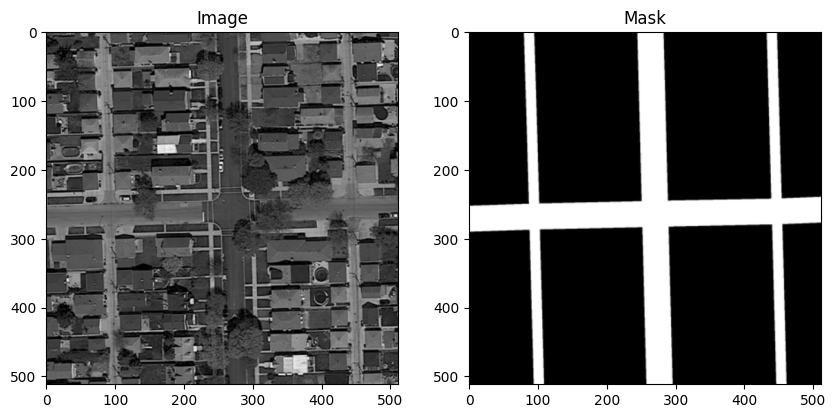

In [5]:
plt.figure(figsize=(10, 5))

# Show the first image
plt.subplot(1, 2, 1)
plt.imshow(x_batch[0], cmap='gray')
plt.title("Image")

# Show the first mask
plt.subplot(1, 2, 2)
plt.imshow(y_batch[0], cmap='gray')
plt.title("Mask")

plt.show()


In [6]:
import os
# Count the number of images in the save directory

augmented_images_dir = os.path.join(image_dir)
augmented_masks_dir = os.path.join(mask_dir)

num_augmented_images = len(os.listdir(augmented_images_dir))
num_augmented_masks = len(os.listdir(augmented_masks_dir))

print(f"Number of augmented images: {num_augmented_images}")
print(f"Number of augmented masks: {num_augmented_masks}")

Number of augmented images: 500
Number of augmented masks: 500


In [8]:
print(f"Number of augmented images in the batch: {x_batch.shape[0]}")  

Number of augmented images in the batch: 16
